# equalize y value

In [28]:
import cv2
import os


# Get the workspace path
workspace_path = os.getcwd()
print(workspace_path)

# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))

# Convert the image to YUV color space
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Apply histogram equalization to the Y channel
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# Convert the image back to BGR color space
image_enhanced = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_equalize_y_value.jpg'), image_enhanced)







c:\Users\gbo10\Videos\research\counting_research_algorithms\src\image_enhancement


True

# equalize bands

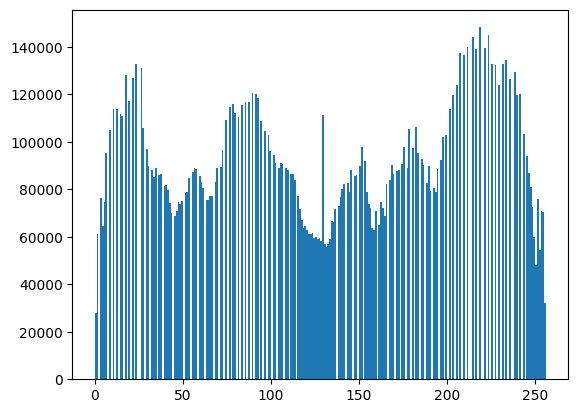

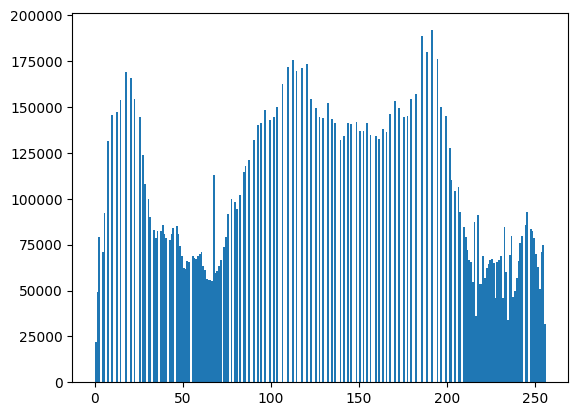

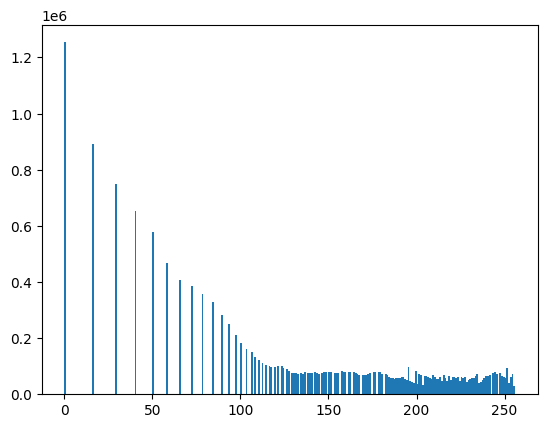

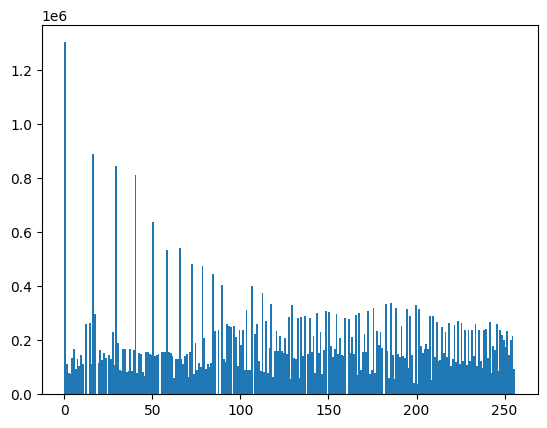

In [29]:
#add histogram equalization to three channels
# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))
#equlaize each band
b, g, r = cv2.split(image)
b = cv2.equalizeHist(b)
g = cv2.equalizeHist(g)
r = cv2.equalizeHist(r)
#merge the bands
image_enhanced = cv2.merge((b, g, r))
# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_equalize_bands.jpg'), image_enhanced)
#show the histograms
import matplotlib.pyplot as plt
plt.hist(b.ravel(),256,[0,256])
plt.show()
plt.hist(g.ravel(),256,[0,256])
plt.show()
plt.hist(r.ravel(),256,[0,256])
plt.show()
plt.hist(image_enhanced.ravel(),256,[0,256])
plt.show()
#show the images



# use CLAHE

In [18]:
# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0.jpg'))

# Convert the image to LAB color space
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into L, A, and B channels
l, a, b = cv2.split(image_lab)

# Apply CLAHE to the L channel
clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8, 8))
l_clahe = clahe.apply(l)

# Merge the CLAHE enhanced L channel with the original A and B channels
image_clahe = cv2.merge((l_clahe, a, b))

# Convert the image back to BGR color space
image_enhanced_clahe = cv2.cvtColor(image_clahe, cv2.COLOR_LAB2BGR)

# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_enhanced_clahe.jpg'), image_enhanced_clahe)


True

# sharpen image

In [20]:
import cv2
import os
import numpy as np

# Get the workspace path
workspace_path = os.getcwd()
print(workspace_path)

# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0.jpg'))

# Create a sharpening kernel
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

# Apply the sharpening kernel to the image
sharpened_image = cv2.filter2D(image, -1, kernel)

# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_sharpened.jpg'), sharpened_image)


c:\Users\gbo10\Videos\research\counting_research_algorithms\src\image_enhancement


True

# unsharp mask

In [28]:
#unsharp masking
# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))

# Apply Gaussian blur
def unsharp_mask(image, kernel_size=(9, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened
sharpened_image = unsharp_mask(image,kernel_size=(7,7),amount=10)

# Display the result
cv2.imwrite(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma_unsharp.jpg'), sharpened_image)



True

# unsharp GPT

In [38]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))


# Gaussian blur the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Amplify the difference and add back to the original image
amount = 50
sharpened = cv2.addWeighted(image, 1 + amount, blurred, -amount, 0)

# Save and display the sharpened image
cv2.imwrite(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma_unsharpgpt.jpg'), sharpened)


True

In [31]:
image = cv2.imread(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))

laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert back to uint8
laplacian = np.uint8(np.absolute(laplacian))

# Add the Laplacian to the original image
sharpened = cv2.add(image, laplacian)

# Save and display the sharpened image
cv2.imwrite(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma_lap.jpg'), sharpened)


True

In [41]:
image = cv2.imread(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))


kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

# Apply the high-pass filter
high_pass = cv2.filter2D(image, -1, kernel)

cv2.imwrite(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma_fil.jpg'), high_pass)


True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

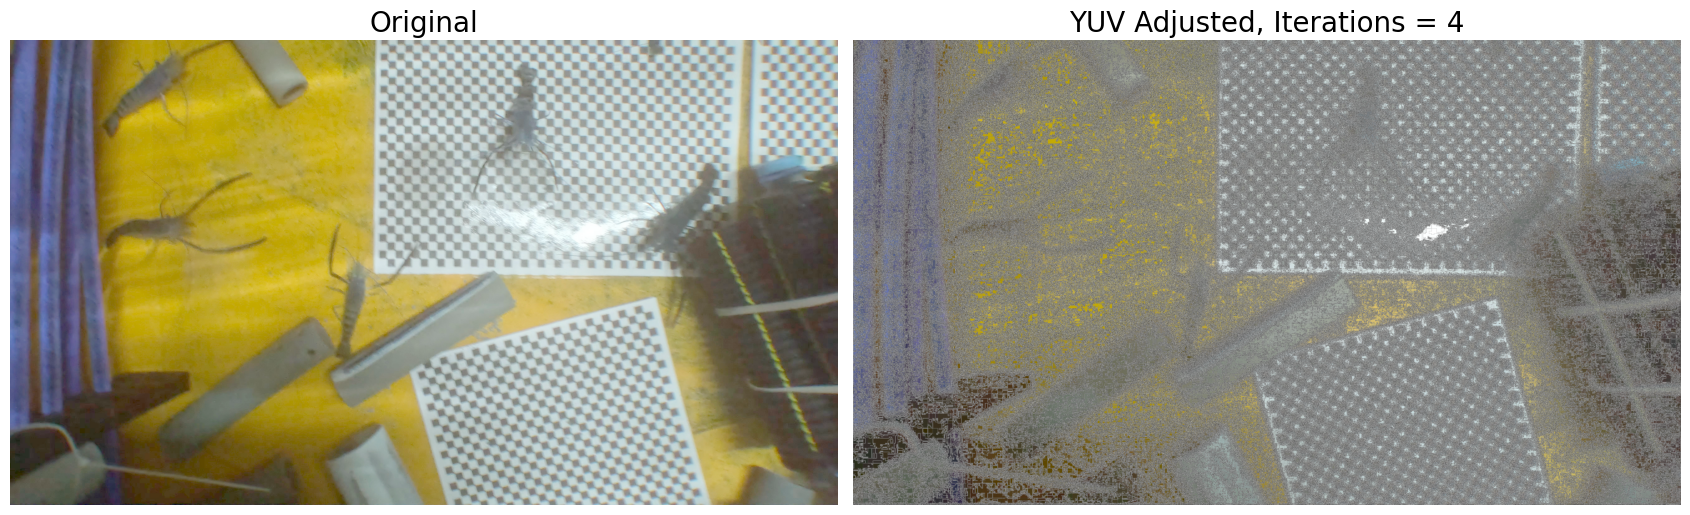

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, yuv2rgb
from scipy.signal import convolve2d

def multi_convolver(channel, kernel, iterations=1):
    """Apply a convolution kernel to an image channel for a given number of iterations."""
    for _ in range(iterations):
        # 'same' mode returns the central part of the convolution, the same size as the image
        channel = convolve2d(channel, kernel, mode='same', boundary='wrap')
    return channel

def convolver_rgb(image, kernel, iterations=1):
    """Apply a convolution kernel to the Y channel of an image in RGB format."""
    # Convert RGB image to YUV
    img_yuv = rgb2yuv(image)
    
    # Apply the convolution kernel to the Y channel
    img_yuv[:, :, 0] = multi_convolver(img_yuv[:, :, 0], kernel, iterations)
    
    # Convert back to RGB
    final_image = yuv2rgb(img_yuv)
    
    # Plot the original and the processed images
    fig, ax = plt.subplots(1, 2, figsize=(17, 10))
    
    ax[0].imshow(image)
    ax[0].set_title('Original', fontsize=20)
    
    ax[1].imshow(final_image)
    ax[1].set_title(f'YUV Adjusted, Iterations = {iterations}', fontsize=20)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    plt.tight_layout()
    
    return final_image

# Example usage:
# Load an image
image = cv2.imread(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))

# Define a sharpening kernel (for example)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply the convolver_rgb function with the image and kernel
final_image = convolver_rgb(image, kernel, iterations=4)


cv2.imwrite(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma_convo.jpg'), final_image)



In [69]:
import cv2
import numpy as np

# read image as grayscale
img = cv2.imread(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'),cv2.IMREAD_GRAYSCALE)

from PIL import Image
from PIL import ImageFilter

# Open an already existing image
imageObject = Image.open(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'));


# Apply sharp filter
sharpened1 = imageObject.filter(ImageFilter.SHARPEN)
sharpened2 = sharpened1.filter(ImageFilter.SHARPEN)
sharpened3= sharpened2.filter(ImageFilter.SHARPEN)

sharpened4= sharpened3.filter(ImageFilter.SHARPEN)

sharpened5= sharpened4.filter(ImageFilter.SHARPEN)
# Show the sharpened images
sharpened1.save(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma111.jpg'))
sharpened2.save(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma222.jpg'))
sharpened3.save(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma333.jpg'))
sharpened4.save(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma444.jpg'))
sharpened5.save(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma555.jpg'))






# sobel

In [16]:
import cv2
import numpy as np

# Load the image

original_image = cv2.imread(os.path.join(workspace_path ,'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply an edge detection filter
# Sobel edge detection to emphasize vertical lines
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)

# Absolute value and convert to uint8
sobelx = np.uint8(np.absolute(sobelx))

# Threshold the Sobel output to create a binary image where the lines are white on a black background
_, binary_image = cv2.threshold(sobelx, 50, 255, cv2.THRESH_BINARY)

# Dilate the lines to make them more visible
kernel = np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Save the resulting image
cv2.imwrite(os.path.join(workspace_path ,'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_soblel.jpg'),dilated_image)



True

# Hough lines

In [17]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread(os.path.join(workspace_path ,'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Optional: Apply Gaussian blur to smooth out the noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use Canny edge detector to find edges
edges = cv2.Canny(blurred_image, 50, 150)

# Use Hough Line Transform to find lines
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

# Draw lines on the original image (could also be drawn on a blank image for clarity)
line_image = original_image.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Save the resulting image with lines overlaid
output_path = 'emphasized_lines_image.jpg'
cv2.imwrite(os.path.join(workspace_path ,'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_hough.jpg'),line_image)


True

# canny

In [14]:

original_image = cv2.imread(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))


gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector on the grayscale image
# Adjust these threshold values (100 and 200) as needed for your specific image
edges = cv2.Canny(gray_image, 0.1, 0.2)

# Convert edges to 3 channels to use it as a mask for the original color image
edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Use bitwise operations to retain color information only on the edges
edges_on_color = cv2.bitwise_and(original_image, edges_colored)

cv2.imwrite(os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_edges_on_color.jpg'), edges_on_color)

True

# erosiion

In [34]:
import cv2
import numpy as np

# Load the original image
image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))


# Define the structuring element (kernel)
kernel = np.ones((5,5), np.uint8)

# Apply erosion
eroded_image = cv2.erode(image, kernel, iterations = 2)

# Save the resulting image
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81e_eroded.jpg'),eroded_image)



True

# dilation

In [36]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))


# Define the structuring element (kernel)
kernel = np.ones((5,5), np.uint8)

# Apply erosion
dilated_image = cv2.dilate(original_image, kernel, iterations = 3)

# Save the resulting image
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_dilated.jpg'),dilated_image)



True

# auto adjust

In [37]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))


auto_contrast_image = cv2.normalize(original_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)


# Save the resulting image
cv2.imwrite(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_auto_contrast_image.jpg'),auto_contrast_image)



True

In [76]:
import cv2
import numpy as np

# Load the original color image
image = cv2.imread(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, 100, 200)

# Dilate the edges to make them thicker
kernel = np.ones((5,5), np.uint8)  # Increased kernel size for thicker edges
edges_dilated = cv2.dilate(edges, kernel, iterations=7)  # Increased iterations for even thicker edges

# Darken the original image more significantly
# darkened_image = (image * 0.5).astype(np.uint8)  # Darken the image further

# Overlay the dilated edges on the darkened image
mask = edges_dilated > 0
edge_color = [255, 255, 255]  # Use white for more contrast
darkened_image_with_edges =image
darkened_image_with_edges[mask] = edge_color

cv2.imwrite("more_emphasized_edges.jpg", darkened_image_with_edges)


True

# Brightness

In [22]:
import cv2
import numpy as np

def adjust_brightness(image, brightness_factor):
    # Convert the image to float
    image_float = image.astype(float)
    # Scale the pixel values
    image_float = image_float * (1 + brightness_factor)
    # Clip the values to the valid range (0 to 255)
    image_float = np.clip(image_float, 0, 255)
    # Convert back to 8-bit unsigned integer
    image_int = image_float.astype(np.uint8)
    return image_int

# Load the image
image = cv2.imread(os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg'))

# Adjust the brightness
brightness_factor = 0.8
image_bright = adjust_brightness(image, brightness_factor)

# Save the image
cv2.imwrite(os.path.join(workspace_path,'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_bright.jpg'), image_bright)

True

In [10]:
workspace_path


'c:\\Users\\gbo10\\Videos\\research\\counting_research_algorithms\\src\\image_enhancement'

# strecthing 

In [19]:
import cv2
import numpy as np
import os

# Assuming 'workspace_path' is already defined
# Load the original RGB image
input_image_path = os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg')
original_image = cv2.imread(input_image_path)

# Convert the RGB image to HSV
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# Extract the Value channel
v_channel = hsv_image[:, :, 2]

# Compute the 2nd and 98th percentiles of the Value channel
p2, p98 = np.percentile(v_channel, (15, 85))

# Perform contrast stretching on the Value channel
v_rescaled = np.clip((v_channel - p2) * 255 / (p98 - p2), 0, 255).astype(np.uint8)

# Update the Value channel in the HSV image
hsv_image[:, :, 2] = v_rescaled

# Convert the HSV image back to RGB
rgb_rescaled = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Save the resulting image
output_image_path = os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_stretch.jpg')
cv2.imwrite(output_image_path, rgb_rescaled)

print(f"Contrast-stretched RGB image saved as {output_image_path}")


Contrast-stretched RGB image saved as c:\Users\gbo10\Videos\research\counting_research_algorithms\src\image_enhancement\GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_stretch.jpg


# histogram equalization

In [69]:
from PIL import Image
import numpy as np

# Load the original color image
input_image = Image.open(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81.jpg'))

# Convert the RGB image to YCbCr
ycbcr_image = input_image.convert('YCbCr')

# Split the YCbCr image into its component channels
y, cb, cr = ycbcr_image.split()

# Convert the Y channel (luminance) to a NumPy array
y_array = np.array(y)

# Perform histogram equalization on the Y channel
y_histeq = np.zeros_like(y_array)
hist, bins = np.histogram(y_array.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]  # Normalize the CDF
y_histeq.flat = cdf_normalized[y_array.flat]  # Map the original values according to the CDF

# Convert the equalized Y channel back to an Image and merge with the original Cb and Cr channels
y_equalized = Image.fromarray(y_histeq)
ycbcr_equalized = Image.merge('YCbCr', (y_equalized, cb, cr))

# Convert the YCbCr image back to RGB
rgb_equalized = ycbcr_equalized.convert('RGB')

# Save the resulting image
rgb_equalized.save(os.path.join(workspace_path, 'GX010071_MP4-0_jpg.rf.ee0df6c24807160545469e2389a0ed81_equalized.jpg'))


# gamma correction for brightness

In [20]:

input_image_path = os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma.jpg')
original_image = cv2.imread(input_image_path)

gamma = 2.2 # Change this value to adjust brightness; < 1 will brighten, > 1 will darken

# Build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")

# Apply gamma correction using the lookup table
gamma_corrected = cv2.LUT(original_image, table)


output_image_path = os.path.join(workspace_path, 'GX010075_MP4-0_jpg.rf.3d736398b28ac28d833419d968df4383.jpg_gamma33.jpg')
cv2.imwrite(output_image_path, gamma_corrected)


True

# Single-Scale Retinex (SSR)

In [5]:
import cv2
import numpy as np
import os

workspace_path = os.getcwd()

input_image_path = os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0.jpg')
original_image = cv2.imread(input_image_path).astype(np.float32) / 255  # Normalize the image


# Define the SSR function with a small constant to avoid log(0)
def single_scale_retinex(img, sigma):
    # Define a small constant epsilon
    epsilon = 1e-6
    # Apply GaussianBlur to estimate the illumination
    illumination = cv2.GaussianBlur(img, (0, 0), sigma)
    # Add the epsilon constant to avoid log(0)
    retinex = np.log10(img + epsilon) - np.log10(illumination + epsilon)
    return retinex

# Apply SSR for each channel
sigma = 50  # Sigma value for GaussianBlur; adjust as needed
ssr_image = np.zeros_like(original_image)
for i in range(3):  # Assuming the image is in BGR format
    ssr_image[:, :, i] = single_scale_retinex(original_image[:, :, i], sigma)

# Normalize the SSR image to bring it back to the 0-255 range
ssr_image = (ssr_image - np.min(ssr_image)) / (np.max(ssr_image) - np.min(ssr_image)) * 255

# Convert the SSR image to uint8 format
ssr_image = np.uint8(ssr_image)

output_image_path = os.path.join(workspace_path, 'GX010077_MP4-7_jpg.rf.72436a6a9751d1c8ac200cdee3a24be0_ssr_image.jpg')
cv2.imwrite(output_image_path, ssr_image)

True

In [87]:
my_image_color = cv2.imread(os.path.join(workspace_path, 'GX010065_1_180.jpg'))

my_image_color = cv2.resize(my_image_color, (600, 400))  # Adjust the size as needed



kernel_sharp_1 = np.array([[-1,-1,-1], [-1,9,-1],[-1,-1,-1]], np.float32)
kernel_sharp_2 = np.array([[1,1,1], [1,-7,1],[1,1,1]], np.float32)

# Apply convolution
image_kernel_sharp_1 = cv2.filter2D(my_image_color, -1, kernel_sharp_1)
image_kernel_sharp_2 = cv2.filter2D(my_image_color, -1, kernel_sharp_2)

cv2.imwrite(os.path.join(workspace_path, 'GX010065_1_180_sharp1.jpg'), image_kernel_sharp_1)
cv2.imwrite(os.path.join(workspace_path, 'GX010065_1_180_sharp2.jpg'), image_kernel_sharp_2)



True

In [81]:
import cv2
import numpy as np

# Load the image
img = cv2.imread(os.path.join(workspace_path, 'GX010065_1_180.jpg'))

# Define a larger sharpening kernel
kernel_sharp_large = np.array([
    [-1, -1, -1, -1, -1],
    [-1,  2,  2,  2, -1],
    [-1,  2,  8,  2, -1],
    [-1,  2,  2,  2, -1],
    [-1, -1, -1, -1, -1]
], np.float32) / 8.0  # The kernel should be normalized (i.e., the sum of all elements should be 1)

# Apply the sharpening filter
img_sharp_large = cv2.filter2D(img, -1, kernel_sharp_large)

# Display the images

cv2.imwrite(os.path.join(workspace_path, 'GX010065_1_180-jjj.jpg'), img_sharp_large)


True